### 필요한 library import

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os  # 데이터 확인(불러오는 것이 아닌, 파일을 확인하는 코드)
for dirname, _, filenames in os.walk(r'\Users\user\PythonWorkspace_VScode\archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

\Users\user\PythonWorkspace_VScode\archive\Live.csv


In [2]:
import warnings

warnings.filterwarnings('ignore')

### import dataset

In [3]:
data = r'\Users\user\PythonWorkspace_VScode\archive\Live.csv'

df = pd.read_csv(data)

### EDA(Exploratory data analysis)

1. 데이터 불러오기 및 확인: 데이터 형식, 변수 유형, 누락된 값 등을 확인
2. 데이터 요약: 요약 통계 (평균, 중앙값, 표준편차 등) 를 사용하여 데이터 요약
3. 데이터 시각화: 히스토그램, 산점도, 박스 플롯 등을 사용하여 데이터 시각화
4. 변수 간의 관계 분석: 상관 분석, 회귀 분석 등을 사용하여 변수 간의 관계 분석
5. 이상값 탐지 및 처리: 이상값을 찾아서 제거 or 처리 

In [4]:
# Check shape of the dataset

df.shape

(7050, 16)

 7050개의 인스턴스(데이터 행)와 16개의 속성(데이터 열)이 있다. 


In [5]:
# Preview the dataset

df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [6]:
# View summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [7]:
#Check for missing values in dataset

df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [8]:
#데이터 세트에 불필요한 열(redundant columns)이 4개 존재하여, 제거
# Drop redundant columns

df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [9]:
# Again view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [10]:
# View the statistical summary of numerical variables (통계 요약)

df.describe() #

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


3 categorical variables  
  
카테고리: 데이터를 분류하는 그룹 또는 클래스를 의미합니다. (예: 상품 카테고리, 고객 연령대)
  
카테고리 변수 특징:  
  
숫자로 표현되지만 순서나 간격에 의미가 없음  
특정 카테고리에 속하는 것을 나타냄  
각 카테고리 내에 여러 가지 값을 가질 수 있음  

In [11]:
# Explore status_id variable
# view the labels in the variable

df['status_id'].unique()

array(['246675545449582_1649696485147474',
       '246675545449582_1649426988507757',
       '246675545449582_1648730588577397', ...,
       '1050855161656896_1060126464063099',
       '1050855161656896_1058663487542730',
       '1050855161656896_1050858841656528'], dtype=object)

In [12]:
# view how many different types of variables are there

len(df['status_id'].unique())

6997

데이터는 7050 개 존재, 고유한 값의 개수는 6997개로, 거의 모든 인스턴스에 대해 고유한 값을 가지고 있다.  
따라서 인스턴스를 구분하는 구분자 역할로 사용되어, 실제 분석에 활용하기 어려우니 데이터 셋에서 제거하는 것이 좋다.

In [13]:
# Explore status_published variable

# view the labels in the variable

df['status_published'].unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      dtype=object)

In [14]:
# view how many different types of variables are there

len(df['status_published'].unique())

6913

status_published 변수의 고유한 값 개수는 6913개로, 이는 역시 거의 모든 인스턴스에 대해 고유한 값을 가지고 있다는 것을 의미한다.  
따라서 앞서 살펴본 status_id 변수와 마찬가지로 status_published 변수도 각 인스턴스를 구분하는 식별자 역할을 하고 있어 분석에 활용하기 어렵다.  
따라서 데이터셋에서 마찬가지로 제거한다. 

In [15]:
# Explore status_type variable

# view the labels in the variable

df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [16]:
# view how many different types of variables are there

len(df['status_type'].unique())

4

status_type 변수에는 4가지 카테고리의 레이블이 존재

In [17]:
# Drop status_id and status_published variable from the dataset

df.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [19]:
# Preview the dataset again

df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


### Declare feature vector and target variable

In [20]:
X = df

y = df['status_type']

### Convert categorical variable into integers

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['status_type'] = le.fit_transform(X['status_type'])

y = le.transform(y)

#LabelEncoder 객체를 사용하여 status_type 열과 y 변수의 값을 숫자로 변환

In [22]:
# View the summary of X

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int32
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int32(1), int64(9)
memory usage: 523.4 KB


In [23]:
# Preview the dataset X

X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


### Feature Scaling

In [24]:
cols = X.columns # X 데이터 프레임의 모든 열 이름을 리스트 형태로 반환하여 cols 변수에 저장

In [25]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [26]:
X = pd.DataFrame(X, columns=[cols])

In [33]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


### K-Means model with two clusters

In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

### K-Means model parameters study

In [28]:
kmeans.cluster_centers_

array([[9.54921576e-01, 6.46330441e-02, 2.67028654e-02, 2.93171709e-02,
        5.71231462e-02, 4.71007076e-02, 8.18581889e-03, 9.65207685e-03,
        8.04219428e-03, 7.19501847e-03],
       [3.28506857e-01, 3.90710874e-02, 7.54854864e-04, 7.53667113e-04,
        3.85438884e-02, 2.17448568e-03, 2.43721364e-03, 1.20039760e-03,
        2.75348016e-03, 1.45313276e-03]])

불변량 (Inertia)  
- 낮을수록 더 좋은 군집을 의미
- 불변량은 K-Means 알고리즘의 목적 함수로써 군집 간의 차이를 최대화하고 군집 내의 유사성을 높이기 위해 사용

In [29]:
kmeans.inertia_

237.75726404419564

매우 높아 적절하지 않음

### Check quality of weak classification by the model

In [31]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 4288 out of 7050 samples were correctly labeled.


In [32]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.61


### Use elbow method to find optimal number of clusters

- Elbow Method의 주요 아이디어는 클러스터의 수(K)를 변화시키면서 K-means 알고리즘을 여러 번 실행한 후에 클러스터 수에 대한 오차 제곱 합(SSE, Sum of Squared Errors)을 계산한 후 그래프에서 나타냄
- 클러스터 수(K)에 따른 SSE의 변화를 관찰하면, 클러스터 수가 증가함에 따라 오차 제곱 합이 감소하다가 어느 시점부터는 감소 폭이 급격히 감소하는 지점 발생
- 이 지점이 그래프에서 팔꿈치(Elbow)처럼 꺾이는 지점으로, 이 지점에서 클러스터의 수를 선택하면 적절한 K 값을 선택할 수 있다. 

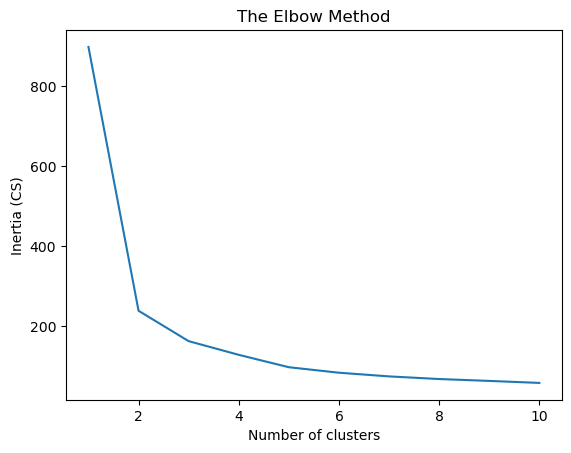

In [34]:
from sklearn.cluster import KMeans

# 빈 리스트 생성 (클러스터 개수에 따른 불변량 저장)
cs = []

# KMeans 객체 생성을 위한 반복문
for i in range(1, 11):
  # KMeans 객체 생성
  # n_init : 초기 중심값 설정을 몇 번 반복할지 설정
  # init : 초기 중심값 설정 방법(K-means++ / random)
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  
  # KMeans 모델 학습
  kmeans.fit(X)
  
  # 불변량 값 추출하여 리스트에 저장
  cs.append(kmeans.inertia_)

# Elbow method 그래프 생성
plt.plot(range(1, 11), cs)  # x축: 클러스터 개수, y축: 불변량
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (CS)')
plt.show()

K = 2 지점에서 꺾인 것이 확인되지만,
이전 실험에서 K=2로 모델을 학습했을 때 분류 정확도가 1%라는 매우 낮은 성능을 보였으므로, 
다른 접근 방법을 고려함

In [36]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))
# float(y.size)를 사용하여 y.size를 실수형으로 변환하고, / 연산을 통해 정확한 비율 값 계산

Result: 4288 out of 7050 samples were correctly labeled.
Accuracy score: 0.61


정확도가 매우 낮으므로, 클러스터의 개수를 조정

In [37]:
# K-Means model with 3 clusters

kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4165 out of 7050 samples were correctly labeled.
Accuracy score: 0.59


In [38]:
# K-Means model with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))


Result: 4347 out of 7050 samples were correctly labeled.
Accuracy score: 0.62
